In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

### 1. Load dataset

In [2]:
df = pd.read_csv("email_spam_dataset.csv")

### 2. Define features and target

In [3]:
X = df.drop("Spam", axis=1)
y = df["Spam"]

### 3. Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Train Decision Tree (Entropy)

In [7]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=4)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 5. Predictions & Evaluation

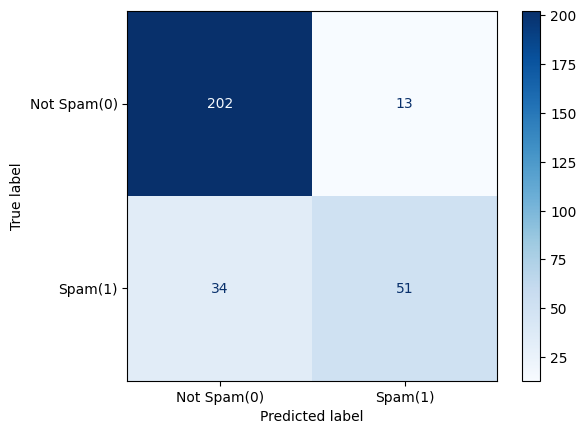

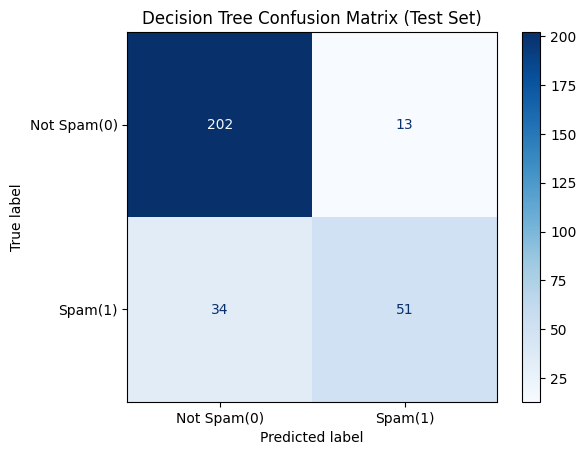

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       215
           1       0.80      0.60      0.68        85

    accuracy                           0.84       300
   macro avg       0.83      0.77      0.79       300
weighted avg       0.84      0.84      0.84       300



In [8]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=["Not Spam(0)", "Spam(1)"]).plot(cmap="Blues").plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix (Test Set)")
plt.show()
print(classification_report(y_test, y_pred))

### 6. Visualize the Tree

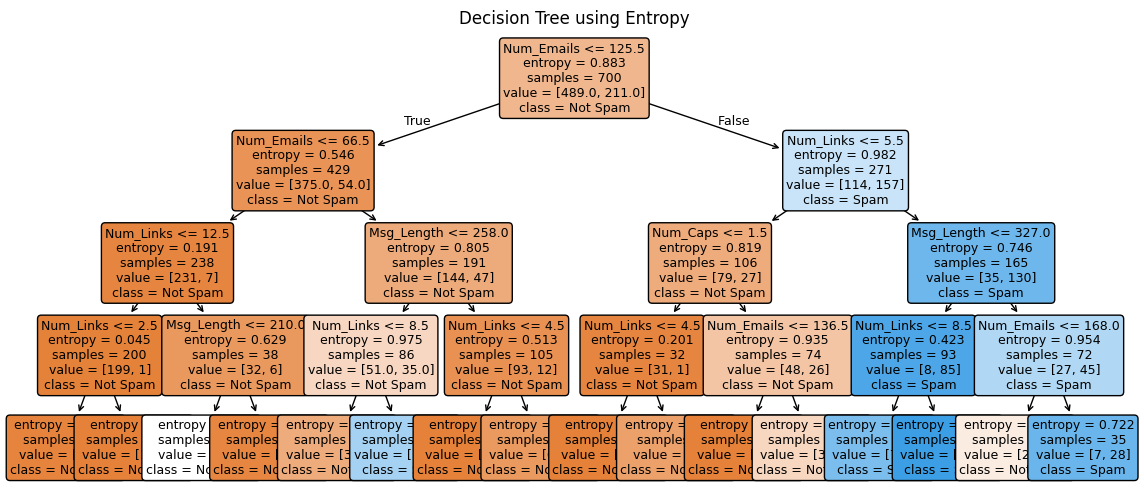

In [11]:
plt.figure(figsize=(14,6))
plot_tree(model, feature_names=X.columns, class_names=["Not Spam", "Spam"], filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree using Entropy")
plt.show()

### 7. Print the actual decision rules

In [12]:
tree_rules = export_text(model, feature_names=list(X.columns))
print(f'\nDecision Tree Rules:\n{tree_rules}')


Decision Tree Rules:
|--- Num_Emails <= 125.50
|   |--- Num_Emails <= 66.50
|   |   |--- Num_Links <= 12.50
|   |   |   |--- Num_Links <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  2.50
|   |   |   |   |--- class: 0
|   |   |--- Num_Links >  12.50
|   |   |   |--- Msg_Length <= 210.00
|   |   |   |   |--- class: 0
|   |   |   |--- Msg_Length >  210.00
|   |   |   |   |--- class: 0
|   |--- Num_Emails >  66.50
|   |   |--- Msg_Length <= 258.00
|   |   |   |--- Num_Links <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  8.50
|   |   |   |   |--- class: 1
|   |   |--- Msg_Length >  258.00
|   |   |   |--- Num_Links <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  4.50
|   |   |   |   |--- class: 0
|--- Num_Emails >  125.50
|   |--- Num_Links <= 5.50
|   |   |--- Num_Caps <= 1.50
|   |   |   |--- Num_Links <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  4.50
|   |   |   |   |--- class: 0
|   |   |--- Num_Caps >